In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

def real_to_fixed(x, n, f):
    x_fixed = np.floor(x * 2**f)
    x_fixed[x_fixed < 0] = (x_fixed + 2**n)[x_fixed < 0]
    return x_fixed

def fixed_to_real(x, n, f):
    x[x >= 2**(n-1)] = (x - 2**n)[x >= 2**(n-1)]
    return x / 2**f

def lut_eval(x, lut):
    y = np.zeros_like(x)
    for i, e in enumerate(x):
        y[i] = lut[int(e)]
    return y

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Experiment with Truncating

In [ ]:
# Setup parameters
n = 16
f = 12
q = 8

# Common values
x_real = np.linspace(-2**(n-1-f), 2**(n-1-f)-2**-f, 2**n)
y_real = sigmoid(x_real)
y_fixed = real_to_fixed(y_real, n, f)
x_fixed = real_to_fixed(x_real, n, f)
x_trunced = np.floor(x_fixed * 2**(-(n-q)))

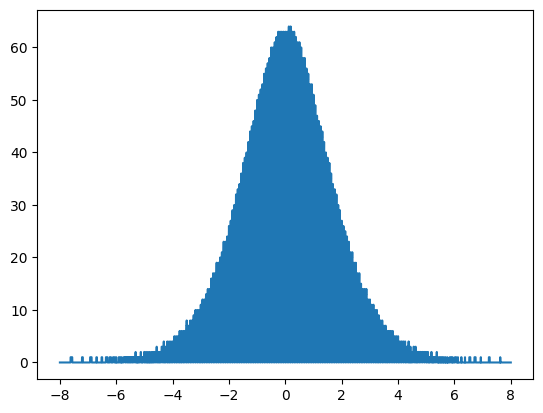

In [37]:
# Quantize
x_lut_fixed = np.linspace(0, 2**(n)-2**(-(q-n)), 2**q)
x_lut = fixed_to_real(x_lut_fixed, n, f)
y_lut = sigmoid(x_lut)
lut = real_to_fixed(y_lut, n, f)
y_quantize = lut_eval(x_trunced, lut)
plt.plot(x_real, y_fixed - y_quantize);

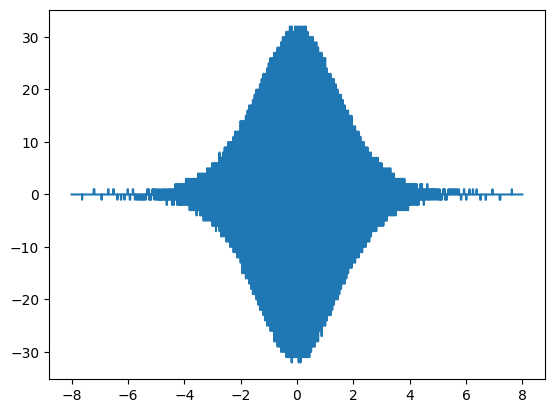

In [ ]:
# Haar wavelet transform
coeffs = pywt.wavedec(y_real, 'haar', level=(n-q))
lut_haar = real_to_fixed(coeffs[0] * 2**(-(n-q)/2), n, f)
lut_haar = np.roll(lut_haar, 2**(q-1))
y_haar = lut_eval(x_trunced, lut_haar)
plt.plot(x_real, y_fixed - y_haar);